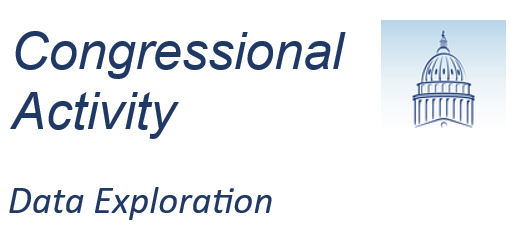
***  
# Introduction  
Since 1947, a summary of each Congressional session has been included in the Congressional Record, under the title Resume of Congressional Activity. The resume includes statistics on the number of measures introduced, bills passed, outcome of confirmations, etc.

The objective of this project is to create a dataset from published Resumes of Congressional Activity for analysis.

For this project, Resumes of Congressional Activity were downloaded in PDF form from <a href="https://www.senate.gov/">Senate.gov</a> and <a href="https://govinfo.gov">GovInfo.com</a>. Resumes from the 98th though 117th Congresses are included in this porject.

Additional information regarding the Resume of Congressional activity can be found at <a href="https://www.congress.gov/help/congressional-record">congress.gov</a>.

***
# Notebook Setup
***

In [10]:
# Import libraries
import re
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
# This notebook requires openpyxl. If you do not have this installed, uncomment the following install command
#!pip install openpyxl

In [12]:
# Set defaults
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 2

***  
# Read Scrubbed Activity Data
***

In [13]:
# Read in all worksheets, dividing the data into general legislative activity and confirmation related activity
file_name = '../Data/Resume Data - Scrubbed.xlsx'
gen_activity_df = pd.read_excel(file_name, sheet_name='General Activity')
confirm_df = pd.read_excel(file_name, sheet_name='Confirmations')

***
# General Activity Data
***
The General Activity dataset contains general data about Congress, as published in the Resumes of Congressional Activity. First, let's read in the raw data from our Excel spreadsheet.

In [14]:
# Preview the General Activity dataframe
gen_activity_df.head()

,Year,Congress,Session,Chamber,Bills not signed,Bills through conference,Bills vetoed,Conference reports,Extension of remarks,Pages of proceedings,...,"Measures reported, Senate joint resolutions","Measures reported, Simple resolutions",Private bills enacted into law,Public bills enacted into law,Quorum calls,Recorded votes,Special reports,Time in session,Vetoes overridden,Yea-and-nay votes
0,1983,98,1,Senate,0,4,3,4,0,17224,...,87,139,0,101,18,0,25,1010,1,381
1,1984,98,2,Senate,0,22,8,0,0,14650,...,99,122,17,166,19,0,11,940,1,292
2,1985,99,1,Senate,0,8,0,2,0,18418,...,118,100,0,110,20,0,18,1252,1,381
3,1986,99,2,Senate,0,0,4,0,0,17426,...,111,63,7,187,16,0,15,1278,1,359
4,1987,100,1,Senate,0,0,1,1,0,18660,...,72,62,2,96,36,0,28,1214,2,420


## Features and Scope
Let's get a basic sense of the general activity data

In [15]:
# Review the features of the dataset
gen_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 41 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Year                                              120 non-null    int64 
 1   Congress                                          120 non-null    int64 
 2   Session                                           120 non-null    int64 
 3   Chamber                                           120 non-null    object
 4   Bills not signed                                  120 non-null    int64 
 5   Bills through conference                          120 non-null    int64 
 6   Bills vetoed                                      120 non-null    int64 
 7   Conference reports                                120 non-null    int64 
 8   Extension of remarks                              120 non-null    int64 
 9   Pages of proceedings            

***  
Most of these features are self explanatory, but a few may need some clarification:  
* Year, Congress, Session - Identifies the unique session of congress  
* Chamber - House or Senate  
* Days In Session, Time In Session - Reflects the actual amount of time the chamber was in session
* Pages Of Proceedings - NEED TO CLARIFY
* Extension Of Remarks - NEED TO CLARIFY
* Public Bills Enacted Into Laws, Private Bills Enacted Into Law - Laws enacted by originating Chamber during the session. Public laws impact the general public or specific classes of citizens. Private laws are limited in impact to specific individuals or organizations.
* Bills In Conference, Bills Through Conference - Bills that have been to passed by both houses in different forms and are in conference or reconciled by conference, repsectively
* Special Reports - 
* Conference Reports - 
* Measures Pending On Calendar - 
* Quorum Calls
* Yea-And-Nay Votes, Recorded Votes - 
* Bills Vetoed, Vetoes Overridden, Bills Not Signed -   

For more information, the 

https://sgp.fas.org/crs/misc/98-265.pdf
***  

In [16]:
# Let's review the general statistics for this dataset to see if anything stands out
gen_activity_df.describe()

,Year,Congress,Session,Bills not signed,Bills through conference,Bills vetoed,Conference reports,Extension of remarks,Pages of proceedings,Days in session,...,"Measures reported, Senate joint resolutions","Measures reported, Simple resolutions",Private bills enacted into law,Public bills enacted into law,Quorum calls,Recorded votes,Special reports,Time in session,Vetoes overridden,Yea-and-nay votes
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2002.500000,107.500000,1.500000,0.016667,2.050000,2.375000,7.008333,1071.625000,11309.666667,101.508333,...,7.866667,45.100000,3.700000,140.741667,5.525000,93.433333,15.383333,674.575000,0.308333,215.541667
std,11.591797,5.790459,0.502096,0.128556,7.832114,4.109964,13.211591,1528.214029,8510.161821,74.518059,...,23.541465,46.245127,7.810357,97.646205,9.659725,152.321075,18.351921,512.135957,0.658440,172.219271
min,1983.000000,98.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.750000,102.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7503.500000,0.000000,...,0.000000,0.000000,0.000000,72.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2002.500000,107.500000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,11029.500000,134.500000,...,0.000000,29.000000,0.000000,120.500000,2.000000,0.000000,10.500000,868.500000,0.000000,268.000000
75%,2012.250000,112.250000,2.000000,0.000000,0.000000,3.000000,4.000000,2223.750000,15287.250000,159.000000,...,2.000000,93.000000,4.000000,198.250000,6.000000,195.750000,22.500000,1039.250000,0.000000,326.000000
max,2022.000000,117.000000,2.000000,1.000000,52.000000,21.000000,56.000000,5985.000000,35003.000000,211.000000,...,118.000000,149.000000,46.000000,473.000000,55.000000,671.000000,97.000000,1839.000000,4.000000,648.000000


In [17]:
# Review the span of data available
print(f'Years: {gen_activity_df["Year"].min()} to {gen_activity_df["Year"].max()}')
print(f'Congresses: {gen_activity_df["Congress"].min()} to {gen_activity_df["Congress"].max()}')

Years: 1983 to 2022
Congresses: 98 to 117


In [18]:
# Verify all records are labeled as House or Senate for Chamber
gen_activity_df['Chamber'].unique()

array(['Senate', 'House', 'Both'], dtype=object)

## Data Prep

In [19]:
# Let's review the top rows of data to see if we need to do any cleanup
gen_activity_df.head()

,Year,Congress,Session,Chamber,Bills not signed,Bills through conference,Bills vetoed,Conference reports,Extension of remarks,Pages of proceedings,...,"Measures reported, Senate joint resolutions","Measures reported, Simple resolutions",Private bills enacted into law,Public bills enacted into law,Quorum calls,Recorded votes,Special reports,Time in session,Vetoes overridden,Yea-and-nay votes
0,1983,98,1,Senate,0,4,3,4,0,17224,...,87,139,0,101,18,0,25,1010,1,381
1,1984,98,2,Senate,0,22,8,0,0,14650,...,99,122,17,166,19,0,11,940,1,292
2,1985,99,1,Senate,0,8,0,2,0,18418,...,118,100,0,110,20,0,18,1252,1,381
3,1986,99,2,Senate,0,0,4,0,0,17426,...,111,63,7,187,16,0,15,1278,1,359
4,1987,100,1,Senate,0,0,1,1,0,18660,...,72,62,2,96,36,0,28,1214,2,420


In [20]:
# Split House and Senate data into separate dataframes for ease of comparison
gen_house_df = gen_activity_df.loc[gen_activity_df['Chamber'] == 'House'].copy()
gen_senate_df = gen_activity_df.loc[gen_activity_df['Chamber'] == 'Senate'].copy()

In [21]:
# I'm mostly interested in the activity for each congress, so let's drop Year and Session and group data by Congress
gen_house_df.drop(['Year', 'Session'], axis=1, inplace=True)
gen_senate_df.drop(['Year', 'Session'], axis=1, inplace=True)
gen_house_df = gen_house_df.groupby(by='Congress').sum()
gen_senate_df = gen_senate_df.groupby(by='Congress').sum()

In [22]:
# Preview House dataframe
gen_house_df.head()

,Bills not signed,Bills through conference,Bills vetoed,Conference reports,Extension of remarks,Pages of proceedings,Days in session,"Measures introduced, total","Measures introduced, Bills","Measures introduced, Concurrent resolutions",...,"Measures reported, Senate joint resolutions","Measures reported, Simple resolutions",Private bills enacted into law,Public bills enacted into law,Quorum calls,Recorded votes,Special reports,Time in session,Vetoes overridden,Yea-and-nay votes
Congress,,,,,,,,,,,,,,,,,,,,,
98,0,59,13,86,0,22958,266,8104,6442,379,...,2,237,35,356,90,382,99,1703,2,524
99,0,19,16,69,0,24992,281,7522,5743,419,...,5,189,17,367,80,411,139,1794,2,479
100,0,0,12,65,0,24368,298,7269,5585,398,...,2,197,36,424,37,397,141,1658,3,542
101,0,33,17,87,7870,23191,281,7611,5977,401,...,2,190,8,381,37,381,101,1687,4,497
102,0,0,15,86,3332,24674,277,7771,6212,384,...,0,210,15,396,31,392,76,1794,2,509


In [23]:
# Preview Senate dataframe
gen_senate_df.head()

,Bills not signed,Bills through conference,Bills vetoed,Conference reports,Extension of remarks,Pages of proceedings,Days in session,"Measures introduced, total","Measures introduced, Bills","Measures introduced, Concurrent resolutions",...,"Measures reported, Senate joint resolutions","Measures reported, Simple resolutions",Private bills enacted into law,Public bills enacted into law,Quorum calls,Recorded votes,Special reports,Time in session,Vetoes overridden,Yea-and-nay votes
Congress,,,,,,,,,,,,,,,,,,,,,
98,0,26,11,4,0,31874,281,4097,3095,155,...,186,261,17,267,37,0,36,1950,2,673
99,0,8,4,2,0,35844,313,4080,2954,175,...,229,163,7,297,36,0,33,2530,2,740
100,0,0,7,1,0,36057,307,4013,2930,169,...,160,105,12,289,62,0,41,2340,3,799
101,0,16,4,0,0,35296,274,4184,3281,159,...,155,62,8,269,14,0,31,2253,0,638
102,1,0,9,1,0,37197,287,4245,3392,143,...,74,56,5,194,8,0,29,2291,1,550


## Time In Session
Since the number of hours that Congress meets per day can vary widely, let's look at Time In Session
as a measure of how long a Congress was in session.

In [25]:
# General statistics of Time In Session per Congress by Chamber
time_df = pd.concat([gen_house_df['Time in session'].describe(), gen_senate_df['Time in session'].describe()], axis=1)
time_df.columns = ['House', 'Senate']
time_df = time_df.astype(int)
time_df

,House,Senate
count,20,20
mean,1798,2249
std,312,253
min,1329,1853
25%,1622,2024
50%,1756,2251
75%,1937,2393
max,2444,2875


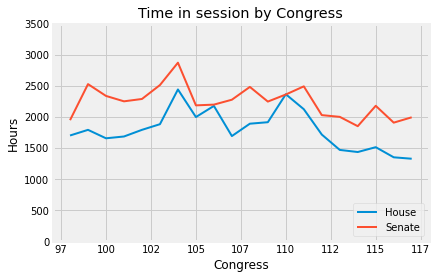

In [27]:
# Plot Hours In Session for each Chamber by Congress
print()
fig, ax = plt.subplots()
gen_house_df[['Time in session']].plot(ax=ax)
gen_senate_df[['Time in session']].plot(ax=ax)
ax.set_title('Time in session by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Hours')
ax.set_ylim(bottom=0, top=3500)
ax.legend(['House', 'Senate'], loc='lower right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

In [28]:
# Let's add a feature for average hours per day to both our dataframes
gen_house_df['Avg hours per day'] = gen_house_df['Time in session'] / gen_house_df['Days in session']
gen_senate_df['Avg hours per day'] = gen_senate_df['Time in session'] / gen_house_df['Days in session']

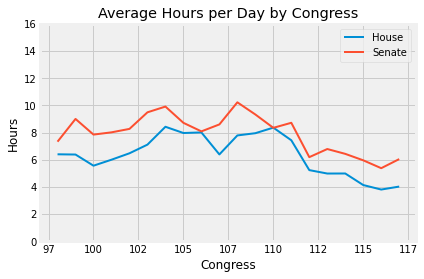

In [30]:
# Plot Average Hours Per Day In Session for each Chamber by Congress
print()
fig, ax = plt.subplots()
gen_house_df[['Avg hours per day']].plot(ax=ax)
gen_senate_df[['Avg hours per day']].plot(ax=ax)
ax.set_title('Average Hours per Day by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Hours')
ax.set_ylim(bottom=0, top=16)
ax.legend(['House', 'Senate'], loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

## Proceedings and Remarks  
The Pages of Proceedings is the total number of pages in the Congressional Record iused to record proceedings each chamber for that session. The Extension of Remarks, likewise, is the number of pages used in the Congressional Record for remarks for each chamber

In [32]:
# Let's look at Pages Of Proceedings, which is a combination of string and int data
gen_activity_df['Pages of proceedings'].values

array([17224, 14650, 18418, 17426, 18660, 17397, 16944, 18352, 18853,
       18344, 17241, 15471, 19345, 12471, 12724, 13004, 15226, 11943,
       14084, 11801, 16221, 12087, 14425, 11849, 16071, 10981, 14141,
       11075,  8793,  8668,  9124,  6941,  8913,  7184,  8289,  8065,
        7247,  8017,  9319, 10113, 10665, 12293, 13336, 11656, 13078,
       11290,  9746, 13445, 12063, 12611, 11002, 11573, 15658, 12304,
       10963, 12048, 12908, 12439, 10967,  9135, 12928, 11057, 13189,
        9202, 16951, 10976, 15507,  8993, 10033,  7589,  8138, 10336,
       10717,  7641, 10434, 10612, 12308,  9184,  7849, 10550, 27889,
       26896, 31754, 29082, 31738, 28687, 26690, 31797, 30916, 30955,
       18234, 27044, 35003,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int64)

In [39]:
gen_activity_df[gen_activity_df['Pages of proceedings'] == 0]['Chamber'].unique()

array(['Both'], dtype=object)

In [41]:
# General statistics of Pages of Proceedings per Congress by Chamber
time_df = pd.concat([gen_house_df['Pages of proceedings'].describe(), gen_senate_df['Pages of proceedings'].describe()], axis=1)
time_df.columns = ['House', 'Senate']
time_df = time_df.astype(int)
time_df

,House,Senate
count,20,20
mean,22668,26355
std,3002,7435
min,17622,15264
25%,20810,18939
50%,22984,26663
75%,24543,32083
max,27962,37197


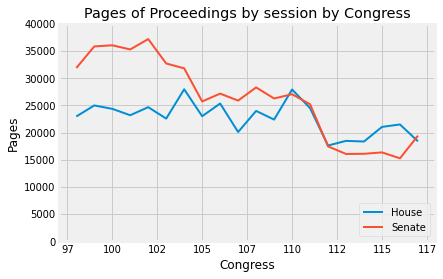

In [45]:
# Plot Pages of Proceedings for each Chamber by Congress
print()
fig, ax = plt.subplots()
gen_house_df[['Pages of proceedings']].plot(ax=ax)
gen_senate_df[['Pages of proceedings']].plot(ax=ax)
ax.set_title('Pages of Proceedings by session by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Pages')
ax.set_ylim(bottom=0, top=40000)
ax.legend(['House', 'Senate'], loc='lower right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

In [24]:
# Let's look at Extension Of Remarkss, which is also combination of string and int data
gen_activity_df['Extension Of Remarks'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4262, 0, 3298,
       0, 0, 0, 2340, 0, 2455, 0, 1929, 0, 2403, 0, 2333, 0, 2537, 0,
       2107, 0, 2187, 0, 2144, 0, 2550, 0, 2201, 0, 2651, 0, 2187, 0,
       'E2664', 0, 2336, 0, 2840, 0, 2256, 0, 2347, 0, 1860, 0, 1756, 0,
       1663, 0, 1679, 0, 1556, 0, 1630, 0, 'E1590', 0, 1517, 0, 1075, 0,
       1289, 0, 1368], dtype=object)

In [54]:
# Which Chambers have 0 Extension Of Remarks listed?
print(gen_activity_df['Chamber'].loc[gen_activity_df['Extension of remarks'] == 0].unique())

['Senate' 'House' 'Both']


In [55]:
gen_activity_df['Extension of remarks'].loc[gen_activity_df['Chamber'] == 'Senate'].count()

40

In [50]:
# General statistics of Pages of Proceedings per Congress by Chamber
time_df = pd.concat([gen_house_df['Extension of remarks'].describe(), gen_senate_df['Extension of remarks'].describe()], axis=1)
time_df.columns = ['House', 'Senate']
time_df = time_df.astype(int)
time_df

,House,Senate
count,20,20
mean,3808,0
std,1975,0
min,0,0
25%,3217,0
50%,4387,0
75%,4803,0
max,7870,0


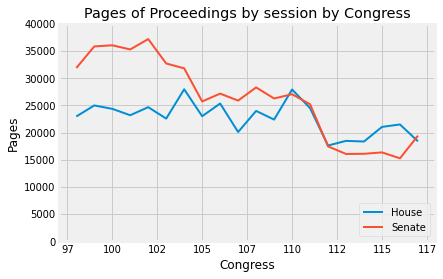

In [45]:
# Plot Pages of Proceedings for each Chamber by Congress
print()
fig, ax = plt.subplots()
gen_house_df[['Pages of proceedings']].plot(ax=ax)
gen_senate_df[['Pages of proceedings']].plot(ax=ax)
ax.set_title('Pages of Proceedings by session by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Pages')
ax.set_ylim(bottom=0, top=40000)
ax.legend(['House', 'Senate'], loc='lower right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

In [26]:
# Which Congresses have Extension Of Remarks that start with E?
gen_activity_df['Congress'].loc[gen_activity_df['Extension Of Remarks'].str.startswith('E', na=False)].unique()

array([110, 115], dtype=int64)

***  
**Further Research Needed:**  
We have the same issue with Extension Of Remarks data as we have for Pages Of Proceedings, in terms of data consistency and cleanliness. In addition, there are years where the Extension Of Remarks is listed, but only as a total across both chambers.
***|

***
**Open Question:**  
Because of the Extension Of Remarks issue with data only being available in the aggregate, should I be reading in and storing the totals from the Resumes Of Congressional Activity?
***

## Bills Through Conference

In [27]:
# General statistics for Bills Through Conference, by Chamber, by Session
bills_conf_df = pd.concat([gen_house_df['Bills Through Conference'].describe(), 
                           gen_senate_df['Bills Through Conference'].describe()], axis=1)
bills_conf_df.columns = ['House', 'Senate']
bills_conf_df = bills_conf_df.astype(int)
bills_conf_df

,House,Senate
count,20,20
mean,4,2
std,13,6
min,0,0
25%,0,0
50%,0,0
75%,0,0
max,56,25


In [28]:
# Let's take a closer look at the Bills Through Conference data, since we are seeing a lot of zeros in the
# general statistics. Specifically, for which Congresses do we have this data?
cong_list = gen_house_df.loc[gen_house_df["Bills Through Conference"] > 0].index.to_list()
cong_list += gen_senate_df.loc[gen_senate_df["Bills Through Conference"] > 0].index.to_list()
print(f'Congresses Reporting Bills Through Congress: {re.sub("{|}", "", str(set(cong_list)))}')

Congresses Reporting Bills Through Congress: 98, 99, 101


***
**Note:**  
Given the small amount of data available, we will exclude the Bills Through Congress feature in future analysis.  
***

## Bills In Conference

In [29]:
# General statistics for Bills In Conference, by Chamber, by Session
bills_conf_df = pd.concat([gen_house_df['Bills In Conference'].describe(), 
                           gen_senate_df['Bills In Conference'].describe()], axis=1)
bills_conf_df.columns = ['House', 'Senate']
bills_conf_df = bills_conf_df.astype(int)
bills_conf_df

,House,Senate
count,20,20
mean,10,12
std,7,16
min,1,0
25%,4,2
50%,8,5
75%,17,11
max,24,56


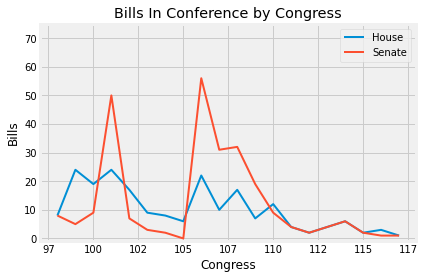

In [30]:
# Bills In Conference by Congress
print()
fig, ax = plt.subplots()
gen_house_df[['Bills In Conference']].plot(ax=ax)
gen_senate_df[['Bills In Conference']].plot(ax=ax)
ax.set_title('Bills In Conference by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Bills')
ax.set_ylim(bottom=-1, top=75)
ax.legend(['House', 'Senate'], loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

## Reports  

**Special Reports**

In [31]:
# General statistics for Special Reports, by Congress
spec_reps_df = pd.concat([gen_house_df['Special Reports'].describe(), 
                           gen_senate_df['Special Reports'].describe()], axis=1)
spec_reps_df.columns = ['House', 'Senate']
spec_reps_df = spec_reps_df.astype(int)
spec_reps_df

,House,Senate
count,20,20
mean,39,28
std,31,6
min,9,12
25%,16,26
50%,29,29
75%,48,33
max,111,41


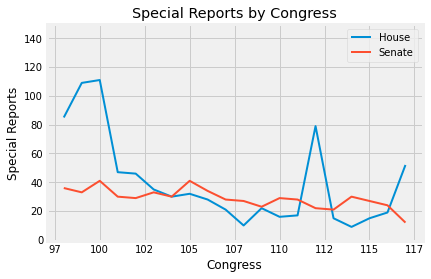

In [32]:
# Special Reports by Congress
print()
fig, ax = plt.subplots()
gen_house_df[['Special Reports']].plot(ax=ax)
gen_senate_df[['Special Reports']].plot(ax=ax)
ax.set_title('Special Reports by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Special Reports')
ax.set_ylim(bottom=-1, top=150)
ax.legend(['House', 'Senate'], loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

**Conference Reports**  

In [33]:
# General statistics for Conference Reports, by Congress
conf_reps_df = pd.concat([gen_house_df['Conference Reports'].describe(), 
                          gen_senate_df['Conference Reports'].describe()], axis=1)
conf_reps_df.columns = ['House', 'Senate']
conf_reps_df = conf_reps_df.astype(int)
conf_reps_df

,House,Senate
count,20,20
mean,38,2
std,31,1
min,0,0
25%,6,0
50%,34,2
75%,66,3
max,87,6


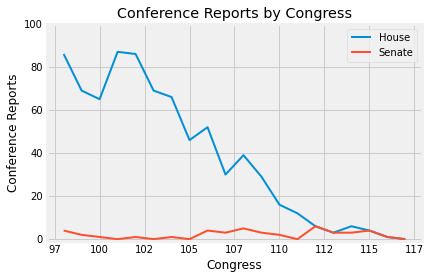

In [34]:
# Conference Reports by Congress
print()
fig, ax = plt.subplots()
gen_house_df[['Conference Reports']].plot(ax=ax)
gen_senate_df[['Conference Reports']].plot(ax=ax)
ax.set_title('Conference Reports by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Conference Reports')
ax.set_ylim(bottom=-1, top=100)
ax.legend(['House', 'Senate'], loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

## Measures Pending On Calendar

In [35]:
# General statistics for Measures Pending on Calendar by Congress
meas_pend_df = pd.concat([gen_house_df['Measures Pending On Calendar'].describe(), 
                           gen_senate_df['Measures Pending On Calendar'].describe()], axis=1)
meas_pend_df.columns = ['House', 'Senate']
meas_pend_df = meas_pend_df.astype(int)
meas_pend_df

,House,Senate
count,20,20
mean,172,465
std,50,184
min,101,184
25%,133,361
50%,169,447
75%,197,579
max,275,994


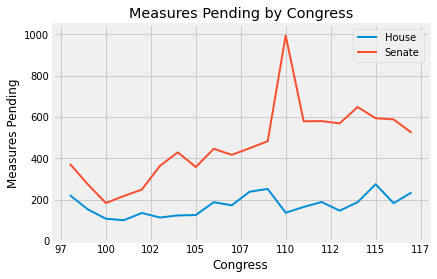

In [36]:
# Measures Pending On Calendar by Congress
print()
fig, ax = plt.subplots()
gen_house_df[['Measures Pending On Calendar']].plot(ax=ax)
gen_senate_df[['Measures Pending On Calendar']].plot(ax=ax) 
ax.set_title('Measures Pending by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Measures Pending')
ax.set_ylim(bottom=-1, top=1050)
ax.legend(['House', 'Senate'], loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

## Quorum Calls

In [37]:
# General statistics for Conference Reports by Congress
quorum_calls_df = pd.concat([gen_house_df['Quorum Calls'].describe(), 
                             gen_senate_df['Quorum Calls'].describe()], axis=1)
quorum_calls_df.columns = ['House', 'Senate']
quorum_calls_df = quorum_calls_df.astype(int)
quorum_calls_df

,House,Senate
count,20,20
mean,19,12
std,25,14
min,2,4
25%,3,5
50%,6,7
75%,28,11
max,90,62


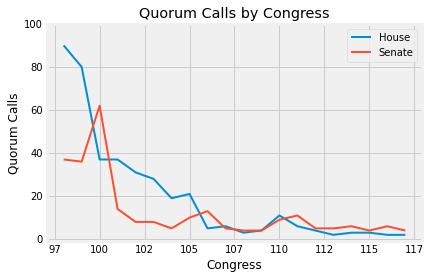

In [38]:
# Quorum Calls by Congress
print()
fig, ax = plt.subplots()
gen_house_df[['Quorum Calls']].plot(ax=ax)
gen_senate_df[['Quorum Calls']].plot(ax=ax)
ax.set_title('Quorum Calls by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Quorum Calls')
ax.set_ylim(bottom=-1, top=100)
ax.legend(['House', 'Senate'], loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

## Votes

**Yea-and-Nay Votes**

In [39]:
# General statistics for Yea-and-Nay Votes, by Congress
yn_votes_df = pd.concat([gen_house_df['Yea-And-Nay Votes'].describe(), 
                         gen_senate_df['Yea-And-Nay Votes'].describe()], axis=1)
yn_votes_df.columns = ['House', 'Senate']
yn_votes_df = yn_votes_df.astype(int)
yn_votes_df

,House,Senate
count,20,20
mean,610,651
std,181,122
min,471,451
25%,498,584
50%,528,648
75%,655,687
max,1116,919


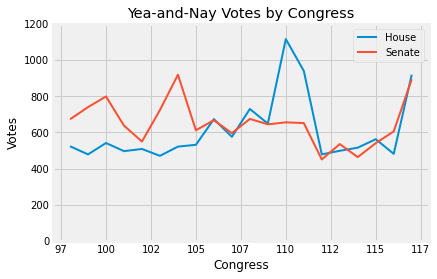

In [40]:
# Yea-and-Nay Votes, by Congress
print()
fig, ax = plt.subplots()
gen_house_df[['Yea-And-Nay Votes']].plot(ax=ax)
gen_senate_df[['Yea-And-Nay Votes']].plot(ax=ax)
ax.set_title('Yea-and-Nay Votes by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Votes')
ax.set_ylim(bottom=-1, top=1200)
ax.legend(['House', 'Senate'], loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

**Recorded Votes**

In [41]:
# General statistics for Recorded Votes, by Congress
rec_votes_df = pd.concat([gen_house_df['Recorded Votes'].describe(), 
                          gen_senate_df['Recorded Votes'].describe()], axis=1)
rec_votes_df.columns = ['House', 'Senate']
rec_votes_df = rec_votes_df.astype(int)
rec_votes_df

,House,Senate
count,20,20
mean,533,0
std,217,0
min,16,0
25%,390,0
50%,518,0
75%,631,0
max,1078,0


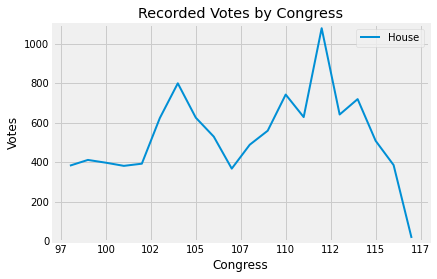

In [42]:
# Recorded Votes, by Congress
print()
fig, ax = plt.subplots()
gen_house_df[['Recorded Votes']].plot(ax=ax)
ax.set_title('Recorded Votes by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Votes')
ax.set_ylim(bottom=-1, top=1100)
ax.legend(['House', 'Senate'], loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

## Vetoes

**Bills Vetoed**

In [43]:
# General statistics for Bills Vetoed, by Congress
vetoes_df = pd.concat([gen_house_df['Bills Vetoed'].describe(), 
                           gen_senate_df['Bills Vetoed'].describe()], axis=1)
vetoes_df.columns = ['House', 'Senate']
vetoes_df = vetoes_df.astype(int)
vetoes_df

,House,Senate
count,20,20
mean,4,1
std,4,2
min,0,0
25%,0,0
50%,3,0
75%,7,2
max,15,7


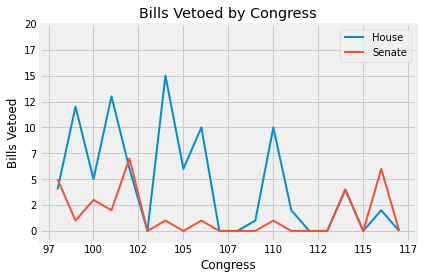

In [44]:
# Conference Reports by Congress
print()
fig, ax = plt.subplots()
gen_house_df[['Bills Vetoed']].plot(ax=ax)
gen_senate_df[['Bills Vetoed']].plot(ax=ax)
ax.set_title('Bills Vetoed by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Bills Vetoed')
ax.set_ylim(bottom=-1, top=20)
ax.legend(['House', 'Senate'], loc='upper right')
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

**Vetoes Overridden**

In [45]:
# General statistics for Vetoes Overridden, by Congress
vetoes_ovr_df = pd.concat([gen_house_df['Vetoes Overridden'].describe(), 
                           gen_senate_df['Vetoes Overridden'].describe()], axis=1)
vetoes_ovr_df.columns = ['House', 'Senate']
vetoes_ovr_df = vetoes_ovr_df.astype(int)
vetoes_ovr_df

,House,Senate
count,20,20
mean,1,0
std,1,1
min,0,0
25%,0,0
50%,0,0
75%,2,1
max,4,4


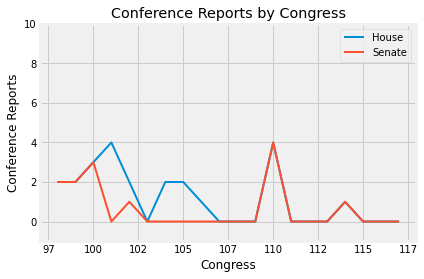

In [46]:
# Vetoes Overridden by Congress
print()
fig, ax = plt.subplots()
gen_house_df[['Vetoes Overridden']].plot(ax=ax)
gen_senate_df[['Vetoes Overridden']].plot(ax=ax)
ax.set_title('Conference Reports by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Conference Reports')
ax.set_ylim(bottom=-1, top=10)
ax.legend(['House', 'Senate'], loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

**Bills Not Signed**

In [47]:
# General statistics for Bills Not Signed by Congress
bills_not_signed_df = pd.concat([gen_house_df['Bills Not Signed'].describe(), 
                           gen_senate_df['Bills Not Signed'].describe()], axis=1)
bills_not_signed_df.columns = ['House', 'Senate']
bills_not_signed_df = bills_not_signed_df.astype(int)
bills_not_signed_df

,House,Senate
count,20,20
mean,0,0
std,0,0
min,0,0
25%,0,0
50%,0,0
75%,0,0
max,0,1


In [48]:
# Let's take a closer look at the Bills Bills Not Signed data, since we are seeing a lot of zeros in the
# general statistics. Specifically, for which Congresses do we have this data?
cong_list = gen_house_df.loc[gen_house_df["Bills Not Signed"] > 0].index.to_list()
cong_list += gen_senate_df.loc[gen_senate_df["Bills Not Signed"] > 0].index.to_list()
print(f'Congresses Reporting Bills Not Signed: {re.sub("{|}", "", str(set(cong_list)))}')

Congresses Reporting Bills Not Signed: 102


***
**Note:**  
Given the small amount of data available, we will exclude the Bills Through Congress feature in future analysis.  
***

***
# Legislative Activity
***

In [49]:
# Read in the General Activity worksheet and save it as a dataframe
file_name = '../Data/Scrubbed Data - Resumes.xlsx'
leg_meas_df = pd.read_excel(file_name, sheet_name='Legislative Measures')

In [50]:
# Preview the General Activity dataframe
leg_meas_df.head()

,Year,Congress,Session,Chamber,Measure Type,Action,Count
0,1983,98,1,Senate,Senate bills,Passed,170
1,1983,98,1,House,Senate bills,Passed,70
2,1984,98,2,Senate,Senate bills,Passed,159
3,1984,98,2,House,Senate bills,Passed,128
4,1985,99,1,Senate,Senate bills,Passed,106


In [51]:
# Review the features of the dataset
leg_meas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1302 non-null   int64 
 1   Congress      1302 non-null   int64 
 2   Session       1302 non-null   int64 
 3   Chamber       1302 non-null   object
 4   Measure Type  1302 non-null   object
 5   Action        1302 non-null   object
 6   Count         1302 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 71.3+ KB


In [52]:
# Review the span of data available
print(f'Years: {leg_meas_df["Year"].min()} to {leg_meas_df["Year"].max()}')
print(f'Congresses: {leg_meas_df["Congress"].min()} to {leg_meas_df["Congress"].max()}')

Years: 1983 to 2022
Congresses: 98 to 117


In [53]:
# Verify all records have Year, Session, Congress and Chamber data
leg_meas_df[['Year', 'Session', 'Congress', 'Chamber']].isna().any().sum()

0

In [54]:
# Verify all records are labeled as House or Senate for Chamber
leg_meas_df['Chamber'].unique()

array(['Senate', 'House'], dtype=object)

In [55]:
# Review the types of measures covered in the dataset
leg_meas_df['Measure Type'].unique()

array(['Senate bills', 'House bills', 'Senate joint resolutions',
       'House joint resolutions', 'Senate concurrent resolutions',
       'House concurrent resolutions', 'Simple resolutions', 'Bills',
       'Joint resolutions', 'Concurrent resolutions'], dtype=object)

In [56]:
# Review the actions covered in the dataset
leg_meas_df['Action'].unique()

array(['Passed', 'Reported', 'Introduced'], dtype=object)

## Data Prep

In [57]:
# Let's convert the Measure Types to Title formatl
leg_meas_df['Measure Type'] = leg_meas_df['Measure Type'].str.title()

In [58]:
# I'm mostly interested in the activity for each congress, so let's delete Year and Session and group data by Congress
leg_meas_df.drop(['Year', 'Session'], axis=1, inplace=True)
leg_meas_df = leg_meas_df.groupby(by=['Congress', 'Chamber', 'Measure Type', 'Action']).sum()
leg_meas_df.reset_index(['Chamber', 'Measure Type', 'Action'], inplace=True)

In [59]:
# Split House and Senate data into separate dataframes for ease of comparison and delete the Chamber feature from each
meas_house_df = leg_meas_df.loc[leg_meas_df['Chamber'] == 'House'].copy()
meas_house_df.drop('Chamber', axis=1, inplace=True)
meas_senate_df = leg_meas_df.loc[leg_meas_df['Chamber'] == 'Senate'].copy()
meas_senate_df.drop('Chamber', axis=1, inplace=True)

In [60]:
# Let's preview our dataset for measures in the House
meas_house_df.head()

,Measure Type,Action,Count
Congress,,,
98,Bills,Introduced,6442
98,Concurrent Resolutions,Introduced,379
98,House Bills,Passed,557
98,House Bills,Reported,658
98,House Concurrent Resolutions,Passed,73


In [61]:
# Let's preview the Senate measures dataset
meas_senate_df.head()

,Measure Type,Action,Count
Congress,,,
98,Bills,Introduced,3093
98,Concurrent Resolutions,Introduced,155
98,House Bills,Passed,338
98,House Bills,Reported,124
98,House Concurrent Resolutions,Passed,60


## Laws Enacted  
Laws enacted is a combined total from both houses, as the Resume of Congressional Activity lists bills enacted
into law by the chamber of origin.

***
**Note:**  
The laws enacted data contained in the Resumes of Congressional Activity do not include total bills by Congress.
There are often a flurry of bills sent to the President at the end of the session, that may not be signed until 
the start of the next session.
***

In [23]:
# General statistics for Bills Enacted Into Law by bill type (Public or Private)
# lists each enacted law under the chamber of origin
bills_df = gen_activity_df[['Congress', 'Chamber', 'Public Bills Enacted Into Law', 
                            'Private Bills Enacted Into Law']].groupby(['Congress', 'Chamber']).sum()
bills_df = bills_df.reset_index().set_index('Congress')
bills_df.groupby('Congress').sum().describe().astype(int)

,Public Bills Enacted Into Law,Private Bills Enacted Into Law
count,20,20
mean,338,6
std,108,8
min,161,0
25%,256,0
50%,355,2
75%,410,8
max,524,29


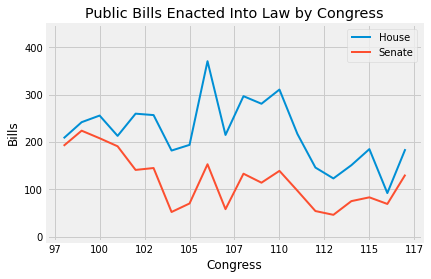

In [63]:
# Plot Public Laws Enacted, by originating Chamber
print()
fig, ax = plt.subplots()
gen_house_df[['Public Bills Enacted Into Law']].plot(ax=ax)
gen_senate_df[['Public Bills Enacted Into Law']].plot(ax=ax)
ax.set_title('Public Bills Enacted Into Law by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Bills')
ax.set_ylim(bottom=-10, top=450)
ax.legend(['House', 'Senate'], loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

## Measures Introduced

In [62]:
# General statistics for Measures Introduced, by Chamber, by Congress
meas_intro_df = pd.concat([meas_house_df.loc[meas_house_df['Action'] == 'Introduced'].groupby('Congress').sum().describe(),
                          meas_senate_df.loc[meas_senate_df['Action'] == 'Introduced'].groupby('Congress').sum().describe()], 
                          axis=1)
meas_intro_df.columns = ['House', 'Senate']
meas_intro_df = meas_intro_df.astype(int)
meas_intro_df

,House,Senate
count,20,20
mean,7699,4162
std,1360,818
min,5330,2661
25%,6841,3688
50%,7576,4088
75%,8215,4454
max,11167,6184


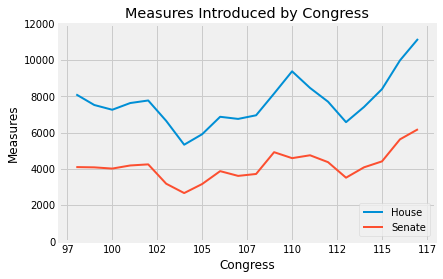

In [63]:
# Measures Introduced, by Congress
print()
fig, ax = plt.subplots()
meas_house_df.loc[meas_house_df['Action'] == 'Introduced'].groupby('Congress').sum().plot(ax=ax)
meas_senate_df[meas_senate_df['Action'] == 'Introduced'].groupby('Congress').sum().plot(ax=ax)
ax.set_title('Measures Introduced by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Measures')
ax.set_ylim(bottom=-1, top=12000)
ax.legend(['House', 'Senate'], loc='lower right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

## Measures Reported

In [64]:
# General statistics for Measures Reported, by Chamber, by Congress
meas_rep_df = pd.concat([meas_house_df.loc[meas_house_df['Action'] == 'Reported'].groupby('Congress').sum().describe(),
                          meas_senate_df.loc[meas_senate_df['Action'] == 'Reported'].groupby('Congress').sum().describe()], 
                          axis=1)
meas_rep_df.columns = ['House', 'Senate']
meas_rep_df = meas_rep_df.astype(int)
meas_rep_df

,House,Senate
count,20,20
mean,773,644
std,139,203
min,536,389
25%,666,509
50%,765,607
75%,892,728
max,988,1138


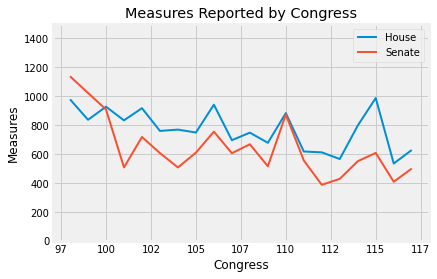

In [65]:
# Measures Reported, by Congress
print()
fig, ax = plt.subplots()
meas_house_df.loc[meas_house_df['Action'] == 'Reported'].groupby('Congress').sum().plot(ax=ax)
meas_senate_df[meas_senate_df['Action'] == 'Reported'].groupby('Congress').sum().plot(ax=ax)
ax.set_title('Measures Reported by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Measures')
ax.set_ylim(bottom=-1, top=1500)
ax.legend(['House', 'Senate'], loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

## Measures Passed

In [66]:
# General statistics for Measures Passed, by Chamber, by Congress
meas_pass_df = pd.concat([meas_house_df.loc[meas_house_df['Action'] == 'Passed'].groupby('Congress').sum().describe(),
                          meas_senate_df.loc[meas_senate_df['Action'] == 'Passed'].groupby('Congress').sum().describe()], 
                          axis=1)
meas_pass_df.columns = ['House', 'Senate']
meas_pass_df = meas_rep_df.astype(int)
meas_pass_df

,House,Senate
count,20,20
mean,773,644
std,139,203
min,536,389
25%,666,509
50%,765,607
75%,892,728
max,988,1138


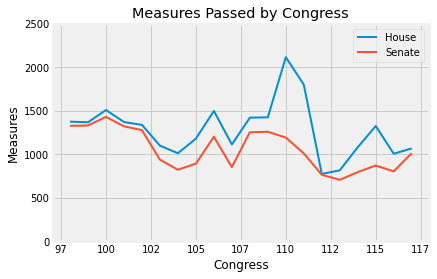

In [67]:
# Measures Passed, by Congress
print()
fig, ax = plt.subplots()
meas_house_df.loc[meas_house_df['Action'] == 'Passed'].groupby('Congress').sum().plot(ax=ax)
meas_senate_df[meas_senate_df['Action'] == 'Passed'].groupby('Congress').sum().plot(ax=ax)
ax.set_title('Measures Passed by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Measures')
ax.set_ylim(bottom=-1, top=2500)
ax.legend(['House', 'Senate'], loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

## Legislative Pipeline

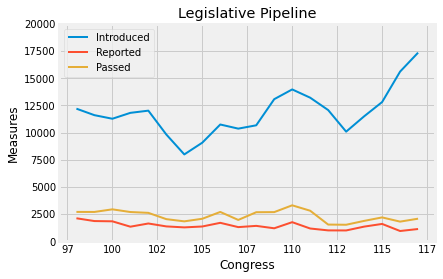

In [68]:
# Measures Passed, by Congress
print()
fig, ax = plt.subplots()
leg_meas_df.loc[leg_meas_df['Action'] == 'Introduced'].groupby('Congress').sum().plot(ax=ax)
leg_meas_df.loc[leg_meas_df['Action'] == 'Reported'].groupby('Congress').sum().plot(ax=ax)
leg_meas_df.loc[leg_meas_df['Action'] == 'Passed'].groupby('Congress').sum().plot(ax=ax)
ax.set_title('Legislative Pipeline')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Measures')
ax.set_ylim(bottom=-1, top=20000)
ax.legend(['Introduced', 'Reported', 'Passed'], loc='upper left')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

In [69]:
# Pivot measures table for analysis
ppln_df = leg_meas_df.groupby(['Congress', 'Action']).sum().reset_index()
ppln_df = ppln_df.pivot(index='Congress', columns='Action', values='Count')
ppln_df = ppln_df[['Introduced', 'Reported', 'Passed']].copy()

In [70]:
# Add columns for percent of measures that have been reported and percent of measures that have been passed
ppln_df['Percent Reported'] = (ppln_df['Reported'] / ppln_df['Introduced'] * 100).astype(int)
ppln_df['Percent Passed'] = (ppln_df['Passed'] / ppln_df['Introduced'] * 100).astype(int)
ppln_df.head()

Action,Introduced,Reported,Passed,Percent Reported,Percent Passed
Congress,,,,,
98,12199,2117,2702,17,22
99,11602,1861,2699,16,23
100,11272,1837,2939,16,26
101,11814,1343,2692,11,22
102,12016,1637,2616,13,21


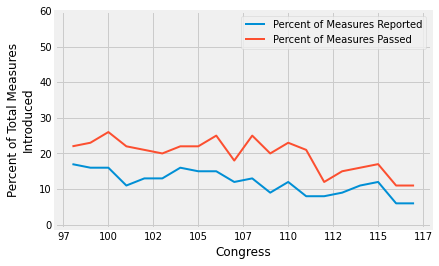

In [71]:
# Measures Passed, by Congress
print()
fig, ax = plt.subplots()
ppln_df['Percent Reported'].plot(ax=ax)
ppln_df['Percent Passed'].plot(ax=ax)
ax.set_title('')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Percent of Total Measures\nIntroduced', wrap=True)
ax.set_ylim(bottom=-1, top=60)
ax.legend(['Percent of Measures Reported', 'Percent of Measures Passed'], loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

***
# Confirmations
***

In [72]:
# Read in the General Activity worksheet and save it as a dataframe
file_name = '../Data/Scrubbed Data - Resumes.xlsx'
conf_df = pd.read_excel(file_name, sheet_name='Confirmations')

In [73]:
# Preview the General Activity dataframe
conf_df.head()

,Year,Congress,Session,Chamber,Branch,Action,Count
0,1983,98,1,Senate,Air Force,Confirmed,12792
1,1983,98,1,Senate,Air Force,Nomination,12819
2,1983,98,1,Senate,Air Force,Returned to White House,1
3,1983,98,1,Senate,Air Force,Unconfirmed,26
4,1983,98,1,Senate,Army,Confirmed,14782


In [74]:
# Review the features of the dataset
conf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      701 non-null    int64 
 1   Congress  701 non-null    int64 
 2   Session   701 non-null    int64 
 3   Chamber   701 non-null    object
 4   Branch    701 non-null    object
 5   Action    701 non-null    object
 6   Count     701 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 38.5+ KB


In [75]:
# Review the span of data available
print(f'Years: {conf_df["Year"].min()} to {conf_df["Year"].max()}')
print(f'Congresses: {conf_df["Congress"].min()} to {conf_df["Congress"].max()}')

Years: 1983 to 2022
Congresses: 98 to 117


In [76]:
# Verify all records have Year, Session, Congress and Chamber data
conf_df[['Year', 'Session', 'Congress', 'Chamber']].isna().any().sum()

0

In [77]:
# Verify all records are labeled as Senate for Chamber
conf_df['Chamber'].unique()

array(['Senate'], dtype=object)

In [78]:
# Review the Branches covered in the dataset
conf_df['Branch'].unique()

array(['Air Force', 'Army', 'Civilian', 'Marine Corps', 'Navy',
       'Space Force'], dtype=object)

In [79]:
# Review the actions covered in the dataset
conf_df['Action'].unique()

array(['Confirmed', 'Nomination', 'Returned to White House',
       'Unconfirmed', 'Withdrawn', 'Recess Appointment', 'Rejected'],
      dtype=object)

## Data Prep

In [80]:
# I'm mostly interested in the activity for each congress, so let's delete Year and Session and group data by Congress
conf_df.drop(['Year', 'Session'], axis=1, inplace=True)
conf_df = conf_df.groupby(by=['Congress', 'Branch', 'Action']).sum()
conf_df.reset_index(['Branch', 'Action'], inplace=True)

In [81]:
# Let's preview our confirmations dataset
conf_df.head()

,Branch,Action,Count
Congress,,,
98,Air Force,Confirmed,24636
98,Air Force,Nomination,24637
98,Air Force,Returned to White House,1
98,Air Force,Unconfirmed,26
98,Army,Confirmed,28813


## Nominations

In [82]:
# General statistics for Nominations, by Type, by Congress
noms_df = conf_df.loc[conf_df['Action'] == 'Nomination']
noms_desc_df = pd.DataFrame()
for branch in noms_df['Branch'].unique():
    noms_desc_df = pd.concat([noms_desc_df, noms_df.loc[noms_df['Branch'] == branch].groupby('Congress').sum().describe()], axis=1)
noms_desc_df.columns = conf_df['Branch'].unique()
noms_desc_df = noms_desc_df.astype(int)
noms_desc_df

,Air Force,Army,Civilian,Marine Corps,Navy,Space Force
count,20,20,20,20,20,2
mean,17466,17415,6024,3647,14881,1547
std,7134,6898,1294,1438,7328,1175
min,8902,7636,3925,1550,7273,716
25%,12097,12631,5291,2636,8918,1131
50%,13962,14260,5944,3553,11629,1547
75%,23308,23328,6821,4687,21721,1962
max,33613,32806,8712,6589,30849,2378


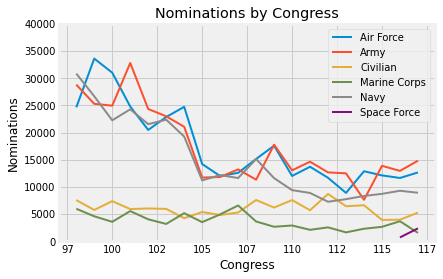

In [83]:
# Nomiations, by Branch, by Congress
print()
fig, ax = plt.subplots()
for branch in noms_df['Branch'].unique():
    noms_df.loc[noms_df['Branch'] == branch].groupby('Congress').sum().plot(ax=ax)
    ax.set_title('Nominations by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Nominations')
ax.set_ylim(bottom=-1, top=40000)
ax.legend(noms_df['Branch'].unique(), loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

## Confirmed Nominees

In [84]:
# General statistics for Confirmed Nominees, by Type, by Congress
conf_noms_df = conf_df.loc[conf_df['Action'] == 'Confirmed']
conf_noms_desc_df = pd.DataFrame()
for branch in conf_noms_df['Branch'].unique():
    conf_noms_desc_df = pd.concat([conf_noms_desc_df, 
                                   conf_noms_df.loc[noms_df['Branch'] == branch].groupby('Congress').sum().describe()], 
                                  axis=1)
conf_noms_desc_df.columns = conf_df['Branch'].unique()
conf_noms_desc_df = noms_desc_df.astype(int)
conf_noms_desc_df

,Air Force,Army,Civilian,Marine Corps,Navy,Space Force
count,20,20,20,20,20,2
mean,17466,17415,6024,3647,14881,1547
std,7134,6898,1294,1438,7328,1175
min,8902,7636,3925,1550,7273,716
25%,12097,12631,5291,2636,8918,1131
50%,13962,14260,5944,3553,11629,1547
75%,23308,23328,6821,4687,21721,1962
max,33613,32806,8712,6589,30849,2378


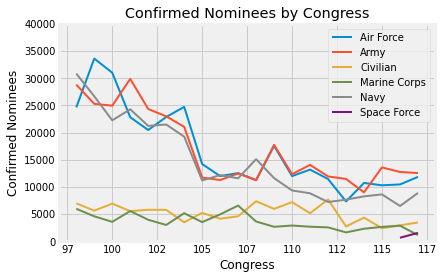

In [85]:
# Confirmed Nominees, by Branch, by Congress
print()
fig, ax = plt.subplots()
for branch in conf_noms_df['Branch'].unique():
    conf_noms_df.loc[conf_noms_df['Branch'] == branch].groupby('Congress').sum().plot(ax=ax)
    ax.set_title('Confirmed Nominees by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Confirmed Nominees')
ax.set_ylim(bottom=-1, top=40000)
ax.legend(noms_df['Branch'].unique(), loc='upper right')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

## Percent Confirmed

In [86]:
conf_per_df = pd.concat([noms_df[['Branch', 'Count']], conf_noms_df[['Count']]], axis=1)
conf_per_df.columns = ['Branch', 'Nominations', 'Confirmed Nominees']
conf_per_df['Percent'] = conf_per_df['Confirmed Nominees'] / conf_per_df['Nominations'] * 100
conf_per_df['Percent'] = conf_per_df[['Percent']].applymap('{:,.2f}'.format).astype(float)
conf_per_df.head()

,Branch,Nominations,Confirmed Nominees,Percent
Congress,,,,
98,Air Force,24637,24636,100.00
98,Army,28815,28813,99.99
98,Civilian,7581,6979,92.06
98,Marine Corps,5985,5985,100.00
98,Navy,30849,30849,100.00


In [87]:
# General statistics for Percent of Nominees Confirmed, by Branch, by Congress
conf_per_desc_df = pd.DataFrame()
for branch in conf_per_df['Branch'].unique():
    conf_per_desc_df = pd.concat([conf_per_desc_df, 
                                  conf_per_df['Percent'].loc[conf_per_df['Branch'] == branch].groupby('Congress').sum().describe()], 
                                  axis=1)
conf_per_desc_df.columns = conf_per_df['Branch'].unique()
conf_per_desc_df = conf_per_desc_df.applymap('{:,.2f}'.format).astype(float)
conf_per_desc_df

,Air Force,Army,Civilian,Marine Corps,Navy,Space Force
count,20.00,20.00,20.00,20.00,20.00,2.00
mean,94.69,97.74,84.90,98.43,97.90,78.00
std,7.72,6.26,15.30,10.10,6.66,18.48
min,74.42,84.63,42.36,73.16,69.88,64.93
25%,91.46,94.44,80.27,99.67,99.05,71.46
50%,99.67,98.82,91.19,99.91,99.56,78.00
75%,99.98,99.98,96.03,100.00,99.95,84.53
max,100.00,117.86,97.83,127.17,100.00,91.06


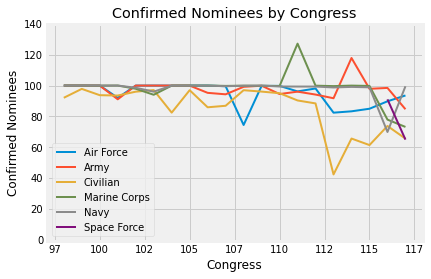

In [88]:
# Confirmed Nominees, by Branch, by Congress
print()
fig, ax = plt.subplots()
for branch in conf_per_df['Branch'].unique():
    conf_per_df[['Percent']].loc[conf_per_df['Branch'] == branch].plot(ax=ax)
ax.set_title('Confirmed Nominees by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Confirmed Nominees')
ax.set_ylim(bottom=-1, top=140)
ax.legend(conf_per_df['Branch'].unique(), loc='lower left')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

In [89]:
# We seem to have some interesting data points - with the Marine Corp and Army branches have confirmed
# well over 100% of the nominations. Let's dig into this a bit further
conf_per_df.loc[conf_per_df['Percent'] > 100]

,Branch,Nominations,Confirmed Nominees,Percent
Congress,,,,
111,Marine Corps,2109,2682,127.17
114,Army,7636,9000,117.86


In [90]:
# Let's look at the original data for Marine Corps nominations 111th Congress to see if we have an 
# issue with our code or with our data
conf_temp_df = pd.read_excel(file_name, sheet_name='Confirmations')
conf_temp_df.loc[(conf_temp_df['Congress'] == 111) & (conf_temp_df['Branch'] == 'Marine Corps')]

,Year,Congress,Session,Chamber,Branch,Action,Count
460,2009,111,1,Senate,Marine Corps,Confirmed,1480
461,2009,111,1,Senate,Marine Corps,Nomination,1482
462,2009,111,1,Senate,Marine Corps,Unconfirmed,2
477,2010,111,2,Senate,Marine Corps,Confirmed,1202
478,2010,111,2,Senate,Marine Corps,Nomination,627
479,2010,111,2,Senate,Marine Corps,Returned to White House,139


The following is from the Resume of Congressional Acitvity for 2009:  
> Marine Corps nominations, totaling 1,482, disposed of as follows:  
>    Confirmed ....................................................................................... 1,480  
>    Unconfirmed .................................................................................. 2  

The following is from the Resume of Congressional Activity for 2010:  
> Marine Corps nominations, totaling 1,341 (including 714 nominations  
> carried over from the First Session), disposed of as follows:  
>   Confirmed ...................................................................................... 1,202  
>   Returned to White House ........................................................ 139  

The issue is with the wording "including 714 nominations carried over from the First Session". However, the numbers from the
first session to not note any carry overs. By ignoring the number of carry over nominations, the math works.

In [91]:
# For this EDA exercise, let's update the incorrect data
conf_df.loc[(conf_df.index == 111) & (conf_df['Branch'] == 'Marine Corps') & (conf_df['Action'] == 'Nomination'), 'Count'] = 2824
conf_per_df.loc[(conf_per_df.index == 111) & (conf_per_df['Branch'] == 'Marine Corps'), 'Nominations'] = 2824

In [92]:
# Let's look at the original data for Army nominations in the 114th Congress to see if we have an 
# issue with our code or with our data
conf_temp_df = pd.read_excel(file_name, sheet_name='Confirmations')
conf_temp_df.loc[(conf_temp_df['Congress'] == 114) & (conf_temp_df['Branch'] == 'Army')]

,Year,Congress,Session,Chamber,Branch,Action,Count
558,2015,114,1,Senate,Army,Confirmed,3354
559,2015,114,1,Senate,Army,Nomination,3482
560,2015,114,1,Senate,Army,Unconfirmed,128
574,2016,114,2,Senate,Army,Confirmed,5646
575,2016,114,2,Senate,Army,Nomination,4154
576,2016,114,2,Senate,Army,Unconfirmed,248


The following is from the Resume of Congressional Acitvity for 2015:  
> Army nominations, totaling 3,482, disposed of as follows:  
>   Confirmed ...................................................................................... 3,354  
>   Unconfirmed .................................................................................. 128  

The following is from the Resume of Congressional Activity for 2016:  
> Army nominations, totaling 5,894 (including 1,740 nominations carried  
over from the First Session), disposed of as follows:  
> Confirmed ...................................................................................... 5,646  
> Unconfirmed .................................................................................. 248  

As before, the issue is with the carry over nominations. Ignoring the carry over number makes the math work.

In [93]:
# For this EDA exercise, let's update the incorrect data
conf_df.loc[(conf_df.index == 114) & (conf_df['Branch'] == 'Army') & (conf_df['Action'] == 'Nomination'), 'Count'] = 9378
conf_per_df.loc[(conf_per_df.index == 114) & (conf_per_df['Branch'] == 'Army'), 'Nominations'] = 9378

In [94]:
# let's refresh the calculated percent column
conf_per_df['Percent'] = conf_per_df['Confirmed Nominees'] / conf_per_df['Nominations'] * 100
conf_per_df['Percent'] = conf_per_df[['Percent']].applymap('{:,.2f}'.format).astype(float)

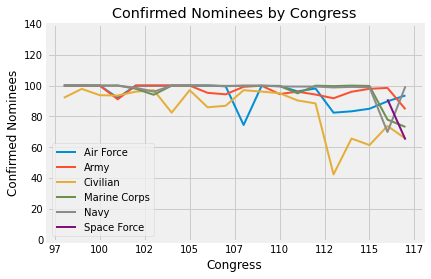

In [95]:
# And regraph...
# Confirmed Nominees, by Branch, by Congress
print()
fig, ax = plt.subplots()
for branch in conf_per_df['Branch'].unique():
    conf_per_df[['Percent']].loc[conf_per_df['Branch'] == branch].plot(ax=ax)
ax.set_title('Confirmed Nominees by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Confirmed Nominees')
ax.set_ylim(bottom=-1, top=140)
ax.legend(conf_per_df['Branch'].unique(), loc='lower left')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.show()

In [101]:
conf_temp_df.loc[conf_temp_df['Year'] == 1998]

,Year,Congress,Session,Chamber,Branch,Action,Count
255,1998,105,2,Senate,Air Force,Confirmed,6087
256,1998,105,2,Senate,Air Force,Nomination,6070
257,1998,105,2,Senate,Air Force,Returned to White House,4
258,1998,105,2,Senate,Army,Confirmed,3
259,1998,105,2,Senate,Army,Nomination,5479
260,1998,105,2,Senate,Civilian,Confirmed,1845
261,1998,105,2,Senate,Civilian,Nomination,1782
262,1998,105,2,Senate,Civilian,Returned to White House,120
263,1998,105,2,Senate,Civilian,Withdrawn,24
264,1998,105,2,Senate,Marine Corps,Confirmed,1847
